<a href="https://colab.research.google.com/github/sparsh-goil/DeepLearning-Labs/blob/master/LabAssignment2_201701061.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.metrics import confusion_matrix
import seaborn as sns

# **Neural Network Model Architecture**

In [ ]:
class NeuralNetwork:
  def __init__(self,batch_size,input_size,hidden_layer1_size,hidden_layer2_size,hidden_layer3_size,output_size):
    self.input_size = input_size
    self.batch_size = batch_size
    self.hidden_layer1_size = hidden_layer1_size
    self.hidden_layer2_size = hidden_layer2_size
    self.hidden_layer3_size = hidden_layer3_size
    self.output_size = output_size
    tf.random.set_seed(42)
    self.W1 = self.initialize_weights(input_size,hidden_layer1_size)
    self.W2 = self.initialize_weights(hidden_layer1_size,hidden_layer2_size)
    self.W3 = self.initialize_weights(hidden_layer2_size,hidden_layer3_size)
    self.W4 = self.initialize_weights(hidden_layer3_size,output_size)
    self.B1 = tf.random.normal(shape = [batch_size,hidden_layer1_size],mean=0,stddev=1,dtype=tf.dtypes.float32)
    self.B2 = tf.random.normal(shape = [batch_size,hidden_layer2_size],mean=0,stddev=1,dtype=tf.dtypes.float32)
    self.B3 = tf.random.normal(shape = [batch_size,hidden_layer3_size],mean=0,stddev=1,dtype=tf.dtypes.float32)
    self.B4 = tf.random.normal(shape = [batch_size,output_size],mean=0,stddev=1,dtype=tf.dtypes.float32)
    self.act = {
        'tanh':tf.math.tanh,
        'relu':tf.nn.relu,
        'sigmoid':tf.math.sigmoid,
        'softmax':tf.nn.softmax,

    }
  def initialize_weights(self,X,Y):
    weights = tf.random.normal(shape=[X,Y],mean=0,stddev=1,dtype=tf.dtypes.float32)
    return weights
    
  def forward(self,X_batch,activation,activation_output):
    # print(activation)
    #hidden layer1
    Z1 = tf.add(tf.matmul(X_batch,self.W1),self.B1)
    A1 = self.act[activation](Z1)
    #hidden layer2
    Z2 = tf.add(tf.matmul(A1,self.W2),self.B2)
    A2 = tf.nn.relu(Z2)
    #hidden layer 3
    Z3 = tf.add(tf.matmul(A2,self.W3),self.B3)
    A3 = self.act[activation](Z3)
    #ouput layer
    Z4 = tf.add(tf.matmul(A3,self.W4),self.B4)
    Output = self.act[activation_output](Z4)
    return Output

# **Accuracy calculation**

In [ ]:
def calculate_accuracy(y_predicted,y_truth):
  return np.sum(y_predicted ==y_truth,axis=0)/float(y_predicted.shape[0])  

# **Task-1 MNIST Dataset** 

## **Importing MNIST Data**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models  import Sequential

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

## **Concatenate Training and Testing Data**

In [ ]:
data_images=np.concatenate((train_images,test_images))
print(data_images.shape)

data_labels=np.concatenate((train_labels,test_labels))
print(data_labels.shape)

(70000, 28, 28, 1)
(70000,)


## **Lets visualize some of the images from dataset.**

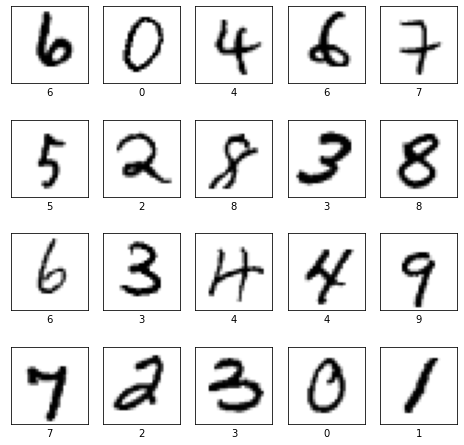

In [ ]:
plt.figure(figsize=(8,8))
random_inds = np.random.choice(70000,20)
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(data_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(data_labels[image_ind])

## **Flattening Image Vectors to 1D (28X28 -> 784)**

In [ ]:
data_images1 = tf.reshape(data_images,shape=[data_images.shape[0],784])
print("Shape of data after flattening: ",data_images1.shape)

Shape of data after flattening:  (70000, 784)


## **Splitting the Data into Train and Test Set**

In [ ]:
#test_size as 0.33
dataset_size = data_images1.shape[0]
trainset_size = math.floor(0.67*dataset_size)
testset_size = dataset_size - trainset_size
X_train,X_test = tf.split(data_images1,[trainset_size,testset_size],axis=0)
y_train,y_test = tf.split(data_labels,[trainset_size,testset_size],axis=0)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(46900, 784) (23100, 784)
(46900,) (23100,)


## **Defining the Model Parameters**

In [ ]:
hidden_layer1_size = 512
hidden_layer2_size = 512
hidden_layer3_size = 512
input_size=784
output_size=10
batch_size = 469


In [ ]:
#function to do batchwise forward propagation with an instance of Neural network and other given
# parameters.
def batchwise_propagation(X_train,y_train,batch_size,NN,activation,activation_output):
  y_pred_class = tf.constant([],dtype = tf.dtypes.int64)
  i=0
  for index, offset in enumerate(range(0,X_train.shape[0], batch_size)):
    x_batch,y_batch = X_train[offset:offset+batch_size] , y_train[offset:offset+batch_size]
    y_pred = NN.forward(x_batch,activation,activation_output)
    y_pred = tf.math.argmax(y_pred,1)
    y_pred_class = tf.concat([y_pred_class,y_pred],axis=0)
    print("Accuracy on batch No.{};- ".format(i),calculate_accuracy(y_pred,y_batch))
    i+=1  
  print('----------------')
  print("Final Accuracy: {}%".format(calculate_accuracy(y_pred_class,y_train)*100))

In [ ]:
NN = NeuralNetwork(
    batch_size=batch_size,
    input_size=input_size,
    hidden_layer1_size=hidden_layer1_size,
    hidden_layer2_size=hidden_layer2_size,
    hidden_layer3_size=hidden_layer3_size,
    output_size=output_size
    )
# Perform forward propagation on the neural network model
batchwise_propagation(X_train,y_train,NN,'relu','softmax')

Accuracy on batch No.0;-  0.08315565031982942
Accuracy on batch No.1;-  0.057569296375266525
Accuracy on batch No.2;-  0.1023454157782516
Accuracy on batch No.3;-  0.06823027718550106
Accuracy on batch No.4;-  0.06396588486140725
Accuracy on batch No.5;-  0.09594882729211088
Accuracy on batch No.6;-  0.09381663113006397
Accuracy on batch No.7;-  0.08528784648187633
Accuracy on batch No.8;-  0.07889125799573561
Accuracy on batch No.9;-  0.07462686567164178
Accuracy on batch No.10;-  0.09594882729211088
Accuracy on batch No.11;-  0.06183368869936034
Accuracy on batch No.12;-  0.05970149253731343
Accuracy on batch No.13;-  0.07249466950959488
Accuracy on batch No.14;-  0.08528784648187633
Accuracy on batch No.15;-  0.07036247334754797
Accuracy on batch No.16;-  0.06396588486140725
Accuracy on batch No.17;-  0.06396588486140725
Accuracy on batch No.18;-  0.05970149253731343
Accuracy on batch No.19;-  0.07462686567164178
Accuracy on batch No.20;-  0.06183368869936034
Accuracy on batch No.21

## **1.Experimentation with different batch size.**

In [ ]:
# Different Batch sizes
hidden_layer1_size = 512
hidden_layer2_size = 256
hidden_layer3_size = 128
input_size=784
output_size=10
batch_size = [469,2345,4690,9380]
for batch in batch_size:
  NN = NeuralNetwork(
    batch_size=batch,
    input_size=input_size,
    hidden_layer1_size=hidden_layer1_size,
    hidden_layer2_size=hidden_layer2_size,
    hidden_layer3_size=hidden_layer3_size,
    output_size=output_size
    )
  print("Accuracy for batch value {}:".format(batch))
  batchwise_propagation(X_train,y_train,batch,NN,'relu','softmax')
  print()


Accuracy for batch value 469:
----------------
Final Accuracy: 11.686567164179104%

Accuracy for batch value 2345:
----------------
Final Accuracy: 11.656716417910449%

Accuracy for batch value 4690:
----------------
Final Accuracy: 11.554371002132196%

Accuracy for batch value 9380:
----------------
Final Accuracy: 11.673773987206824%



### **Remark: Accuracy is near constant.**

## **2.Experimentation with different activation functions.**

In [ ]:
# Different Batch sizes
hidden_layer1_size = 512
hidden_layer2_size = 256
hidden_layer3_size = 128
input_size=784
output_size=10
batch_size = 4690
activation_types = ['relu','sigmoid','softmax','tanh']
activation_vector_types = ['sigmoid','softmax','tanh']
for activation in activation_types:
  for activation_output in activation_vector_types:
    NN = NeuralNetwork(
      batch_size=batch,
      input_size=input_size,
      hidden_layer1_size=hidden_layer1_size,
      hidden_layer2_size=hidden_layer2_size,
      hidden_layer3_size=hidden_layer3_size,
      output_size=output_size
      )
    print("Accuracy for activation hidden {} & output {} :".format(activation,activation_output))
    batchwise_propagation(X_train,y_train,batch,NN,activation,activation_output)
    print('----------------------------------')


Accuracy for activation hidden relu & output sigmoid :
----------------
Final Accuracy: 12.748400852878463%
----------------------------------
Accuracy for activation hidden relu & output softmax :
----------------
Final Accuracy: 11.673773987206824%
----------------------------------
Accuracy for activation hidden relu & output tanh :
----------------
Final Accuracy: 12.742004264392323%
----------------------------------
Accuracy for activation hidden sigmoid & output sigmoid :
----------------
Final Accuracy: 13.247334754797441%
----------------------------------
Accuracy for activation hidden sigmoid & output softmax :
----------------
Final Accuracy: 13.247334754797441%
----------------------------------
Accuracy for activation hidden sigmoid & output tanh :
----------------
Final Accuracy: 13.503198294243072%
----------------------------------
Accuracy for activation hidden softmax & output sigmoid :
----------------
Final Accuracy: 9.895522388059701%
-----------------------------

### **Remark: Accuracy is maximum for hidden activation as sigmoid and output as tanh**

## **3.Experimentation with different hidden layer sizes.**

In [ ]:
# Different Batch sizes
hidden_layer1_size = [512,256,125]
hidden_layer2_size = [512,256,128]
hidden_layer3_size = [512,256,128,64]
input_size=784
output_size=10
batch_size = 4690
for h1 in hidden_layer1_size:
  for h2 in hidden_layer2_size:
    for h3 in hidden_layer3_size:
      NN = NeuralNetwork(
        batch_size=batch,
        input_size=input_size,
        hidden_layer1_size=h1,
        hidden_layer2_size=h2,
        hidden_layer3_size=h3,
        output_size=output_size
        )
      print("Accuracy for hidden layer sizes are {}, {}, {}:".format(h1,h2,h3))
      batchwise_propagation(X_train,y_train,batch,NN,'relu','softmax')
    print('----------')
  print('-------------')


Accuracy for hidden layer sizes are 512, 512, 512:
Final Accuracy: 7.051172707889126%
Accuracy for hidden layer sizes are 512, 512, 256:
Final Accuracy: 11.901918976545842%
Accuracy for hidden layer sizes are 512, 512, 128:
Final Accuracy: 12.92324093816631%
Accuracy for hidden layer sizes are 512, 512, 64:
Final Accuracy: 13.599147121535182%
----------
Accuracy for hidden layer sizes are 512, 256, 512:
Final Accuracy: 14.982942430703625%
Accuracy for hidden layer sizes are 512, 256, 256:
Final Accuracy: 10.00639658848614%
Accuracy for hidden layer sizes are 512, 256, 128:
Final Accuracy: 11.673773987206824%
Accuracy for hidden layer sizes are 512, 256, 64:
Final Accuracy: 9.671641791044776%
----------
Accuracy for hidden layer sizes are 512, 128, 512:
Final Accuracy: 13.466950959488273%
Accuracy for hidden layer sizes are 512, 128, 256:
Final Accuracy: 10.639658848614072%
Accuracy for hidden layer sizes are 512, 128, 128:
Final Accuracy: 9.49040511727079%
Accuracy for hidden layer siz

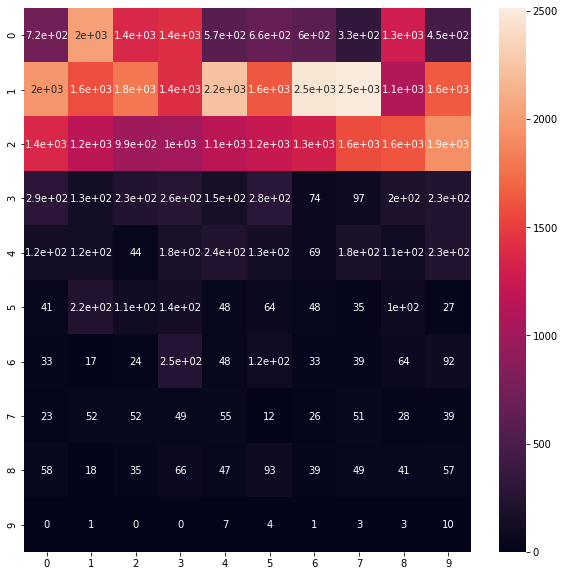

In [ ]:
hidden_layer1_size = 512
hidden_layer2_size = 512
hidden_layer3_size = 512
input_size=784
output_size=10
batch_size = 469
NN = NeuralNetwork(
    batch_size=batch_size,
    input_size=input_size,
    hidden_layer1_size=hidden_layer1_size,
    hidden_layer2_size=hidden_layer2_size,
    hidden_layer3_size=hidden_layer3_size,
    output_size=output_size
    )
y_pred_class = tf.constant([],dtype = tf.dtypes.int64)
  # i=0
for index, offset in enumerate(range(0,X_train.shape[0], batch_size)):
  x_batch,y_batch = X_train[offset:offset+batch_size] , y_train[offset:offset+batch_size]
  y_pred = NN.forward(x_batch,activation,activation_output)
  y_pred = tf.math.argmax(y_pred,1)
  y_pred_class = tf.concat([y_pred_class,y_pred],axis=0)

#create a confusion matrix
cf_matrix = confusion_matrix(y_pred_class,y_train)
plt.subplots(figsize= (10,10))
sns.heatmap(cf_matrix,annot=True)

## **Conclusion**
**1. Relu & sigmoid function are good for hidden activation function. Also, sigmoid & tanh are better for output activation.**

**2. As batch size changes, accuracy remains near constant as we are not training the model.**

**3. For different hidden layer sizes, maxmimum accuracy is 14.98% for (512,256,512).**

**--------------------------------------------------------------------------------------------------------------------------------------------**

# **Task- 2 Boston House Pricing Dataset**




In [ ]:
from keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [ ]:
# y_train[0]
X_train = tf.cast(tf.convert_to_tensor(X_train),dtype=tf.float32)
y_train = tf.cast(tf.convert_to_tensor(y_train),dtype=tf.float32)
X_train

<tf.Tensor: shape=(404, 13), dtype=float32, numpy=
array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]], dtype=float32)>

## **MSE Error**

In [ ]:
def calculate_mse_error(y_pred,y_true):
  y_pred = tf.reshape(y_pred,shape=[y_pred.shape[0],1])
  y_true = tf.reshape(y_true,shape=[y_true.shape[0],1])
  error = tf.math.subtract(y_pred,y_true)
  mse = tf.math.reduce_sum(tf.math.multiply(error,error)/y_pred.shape[0])
  return mse

## **Forward Propagation**

In [ ]:
#function to do batchwise forward propagation with an instance of Neural network and other given
# parameters.
def batchwise_propagation_regression(X_train,y_train,batch_size,NN,activation,activation_output):
  y_predicted = tf.constant([],dtype = tf.dtypes.float32)
  i=0
  for index, offset in enumerate(range(0,X_train.shape[0], batch_size)):
    x_batch,y_batch = X_train[offset:offset+batch_size] , y_train[offset:offset+batch_size]
    y_pred = NN.forward(x_batch,activation,activation_output)
    y_predicted = tf.concat([y_predicted,y_pred[:,0]],axis=0)
    # print("Mean Square error for batch {} is: ".format(i),calculate_mse_error(y_pred,y_batch))
    i+=1  
  print("Mean Square error is: {}.".format(calculate_mse_error(y_predicted,y_train)))
  print('----------------')

In [ ]:
hidden_layer1_size = 10
hidden_layer2_size = 5
hidden_layer3_size = 5
input_size=13
output_size=1
batch_size = 101
RegressionModel = NeuralNetwork(
    batch_size=batch_size,
    input_size=input_size,
    hidden_layer1_size=hidden_layer1_size,
    hidden_layer2_size=hidden_layer2_size,
    hidden_layer3_size=hidden_layer3_size,
    output_size=output_size
    )
# Perform forward propagation on the neural network model
batchwise_propagation_regression(X_train,y_train,batch_size,RegressionModel,'relu','relu')

Mean Square error for batch 0 is:  tf.Tensor(17158.236, shape=(), dtype=float32)
Mean Square error for batch 1 is:  tf.Tensor(15438.244, shape=(), dtype=float32)
Mean Square error for batch 2 is:  tf.Tensor(14346.143, shape=(), dtype=float32)
Mean Square error for batch 3 is:  tf.Tensor(8154.5015, shape=(), dtype=float32)
Mean Square error is: 13774.28125.
----------------


## **Experimentation with different activation functions.**

In [ ]:
hidden_layer1_size = 10
hidden_layer2_size = 5
hidden_layer3_size = 5
input_size=13
output_size=1
batch_size = 101
RegressionModel = NeuralNetwork(
    batch_size=batch_size,
    input_size=input_size,
    hidden_layer1_size=hidden_layer1_size,
    hidden_layer2_size=hidden_layer2_size,
    hidden_layer3_size=hidden_layer3_size,
    output_size=output_size
    )
# Perform forward propagation on the neural network model
activation_types = ['relu','sigmoid','softmax','tanh']
for activation in activation_types:
  print("Result for hidden activation {} is: ".format(activation))
  batchwise_propagation_regression(X_train,y_train,batch_size,RegressionModel,activation,'relu')

Result for hidden activation relu is: 
Mean Square error for batch 0 is:  tf.Tensor(17158.236, shape=(), dtype=float32)
Mean Square error for batch 1 is:  tf.Tensor(15438.244, shape=(), dtype=float32)
Mean Square error for batch 2 is:  tf.Tensor(14346.143, shape=(), dtype=float32)
Mean Square error for batch 3 is:  tf.Tensor(8154.5015, shape=(), dtype=float32)
Mean Square error is: 13774.28125.
----------------
Result for hidden activation sigmoid is: 
Mean Square error for batch 0 is:  tf.Tensor(555.729, shape=(), dtype=float32)
Mean Square error for batch 1 is:  tf.Tensor(536.39136, shape=(), dtype=float32)
Mean Square error for batch 2 is:  tf.Tensor(504.12607, shape=(), dtype=float32)
Mean Square error for batch 3 is:  tf.Tensor(668.13916, shape=(), dtype=float32)
Mean Square error is: 566.0963745117188.
----------------
Result for hidden activation softmax is: 
Mean Square error for batch 0 is:  tf.Tensor(557.4329, shape=(), dtype=float32)
Mean Square error for batch 1 is:  tf.Ten

## **Experimentation with different hidden layer sizes.**

In [ ]:
hidden_layer1_size = [10,7]
hidden_layer2_size = [7,5]
hidden_layer3_size = [5,4]
input_size=13
output_size=1
batch_size = 101

# Perform forward propagation on the neural network model
for h1 in hidden_layer1_size:
  for h2 in hidden_layer2_size:
    for h3 in hidden_layer3_size:
      RegressionModel = NeuralNetwork(
          batch_size=batch_size,
          input_size=input_size,
          hidden_layer1_size=h1,
          hidden_layer2_size=h2,
          hidden_layer3_size=h3,
          output_size=output_size
          )
      print("Result for hidden layer size ({},{},{}) is: ".format(h1,h2,h3))
      batchwise_propagation_regression(X_train,y_train,batch_size,RegressionModel,activation,'relu')

Result for hidden layer size (10,7,5) is: 
Mean Square error is: 544.0216064453125.
----------------
Result for hidden layer size (10,7,4) is: 
Mean Square error is: 567.9602661132812.
----------------
Result for hidden layer size (10,5,5) is: 
Mean Square error is: 583.4900512695312.
----------------
Result for hidden layer size (10,5,4) is: 
Mean Square error is: 577.3900756835938.
----------------
Result for hidden layer size (7,7,5) is: 
Mean Square error is: 544.821044921875.
----------------
Result for hidden layer size (7,7,4) is: 
Mean Square error is: 540.4331665039062.
----------------
Result for hidden layer size (7,5,5) is: 
Mean Square error is: 565.9102783203125.
----------------
Result for hidden layer size (7,5,4) is: 
Mean Square error is: 569.4054565429688.
----------------


### **Remark: MSE is lowest for hidden layer sizes as (10,7,5).**

**-------------------------------------------------------------------The End---------------------------------------------------------------------**